<a href="https://colab.research.google.com/github/jajoonaman/ML_DL_Work/blob/main/House_Pricing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House_Pricing_Prediction**

**Importing libraries and data**


In [ ]:
# Importing Certain important libraries

# Used in Data preprocessing and Visulisation

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

In [ ]:
# Importing the traning and testing data and uploading it to Google Drive

import io

from google.colab import files
upload1 = files.upload()
upload2 = files.upload()
train_data = pd.read_csv(io.StringIO(upload1["train.csv"].decode('utf-8')))
test_data = pd.read_csv(io.StringIO(upload2["test.csv"].decode('utf-8')))


Saving train.csv to train (3).csv


Saving test.csv to test (2).csv


In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Data Visualization**

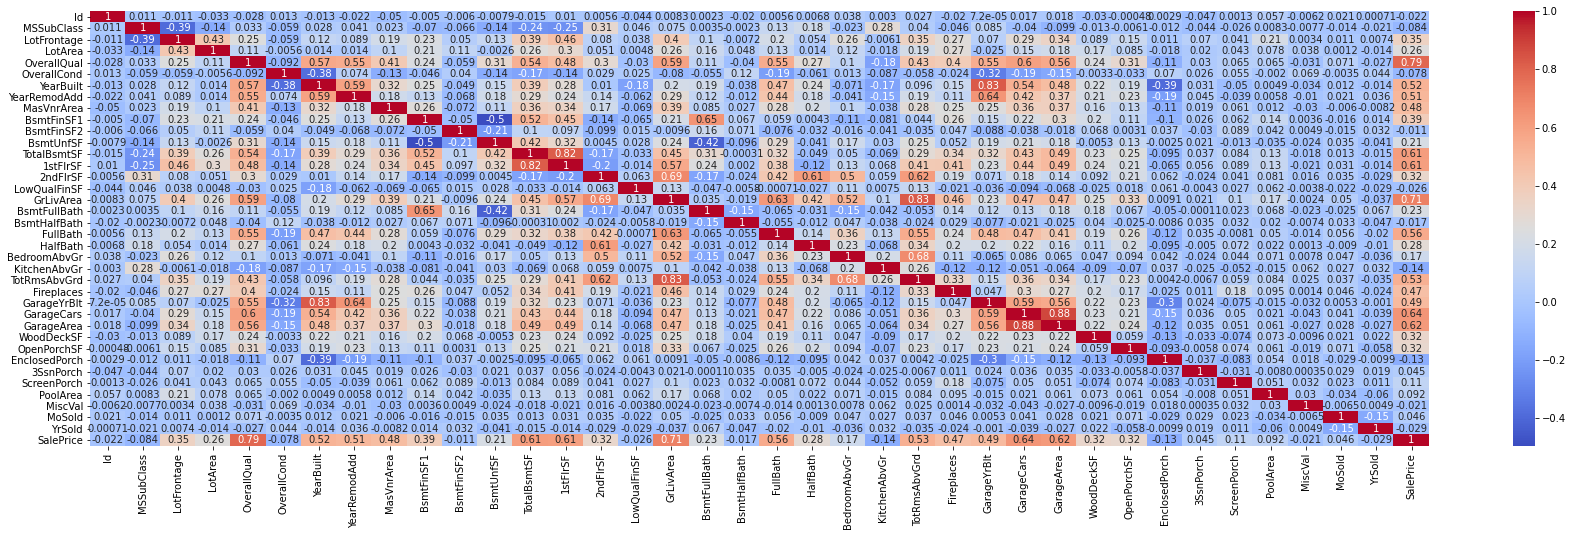

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(train_data.corr(),cmap='coolwarm',annot = True)
plt.show()

In [ ]:
""" We can See that there are co-related parameters in above plotting so, we can pick these features for our ML models. """

co_relation = train_data.corr()
co_relation[co_relation['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [ ]:
""" Dropping columns that has less than 0.3 of co-realtion with sales price """

train = train_data[['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

test = test_data[['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

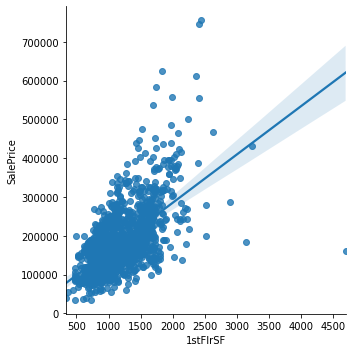

In [ ]:
# Observing Some Different Visualisation for some of the features with Sales Price

sns.lmplot(x='1stFlrSF', y='SalePrice', data= train)

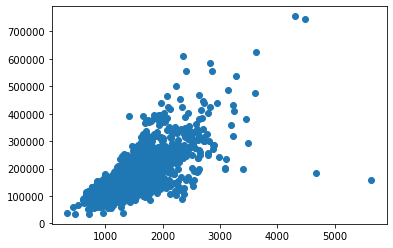

In [ ]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

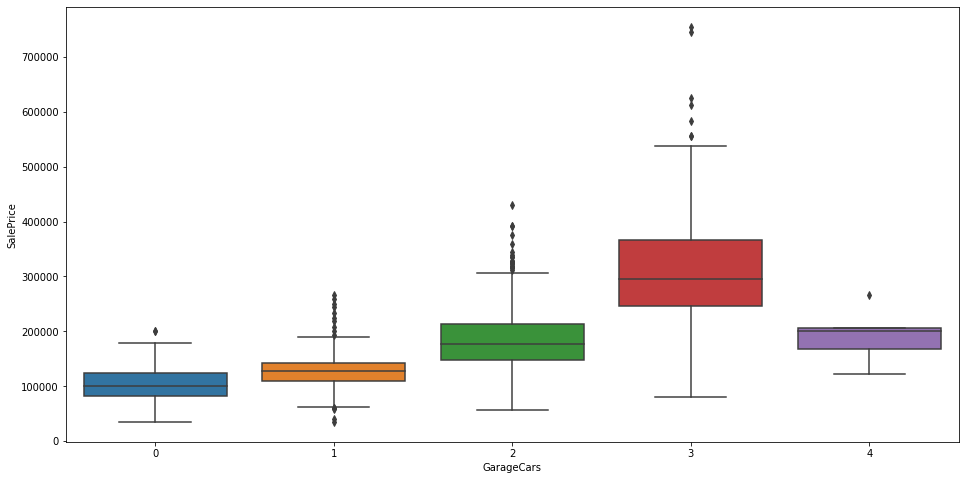

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

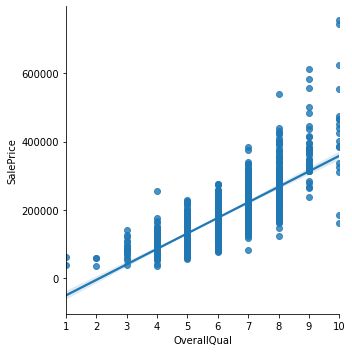

In [ ]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

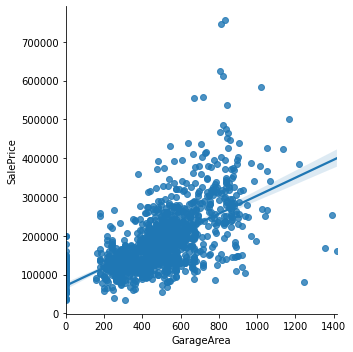

In [ ]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

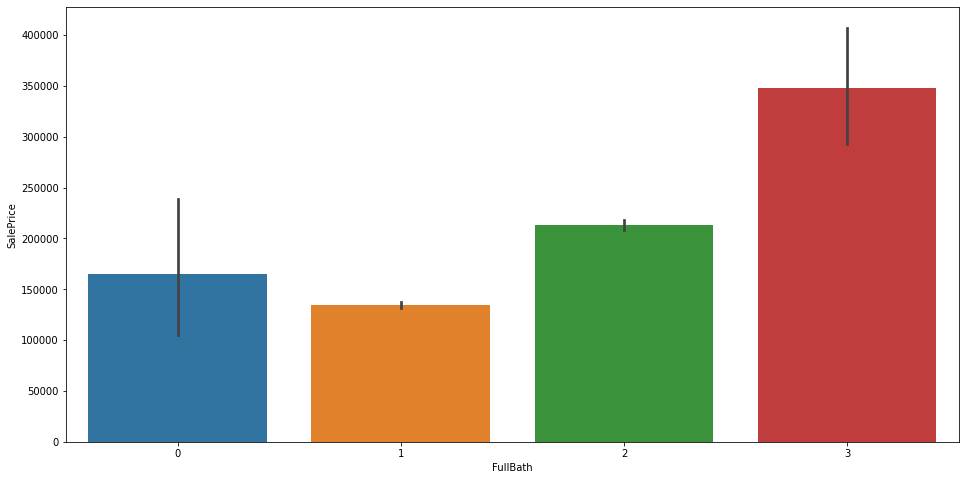

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

**Dealing With Missing Data**

In [ ]:
# Seeing Missing values in train data

# Total no. of values that are lost in the features
total = train.isnull().sum().sort_values(ascending=False)

# Percent of values that are lost
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

# Observing the total missing values with there Percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
1stFlrSF,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
BsmtFinSF1,0,0.000000
TotalBsmtSF,0,0.000000


In [ ]:
""" Droping the feature which has missing values more than 81 in train data """

train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [ ]:
# Seeing Missing values in test data

# Total no. of values that are lost in the features
total = test.isnull().sum().sort_values(ascending=False)

# Percent of values that are lost
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)

# Observing the total missing values with there Percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
TotalBsmtSF,1,0.000685
GarageArea,1,0.000685
GarageCars,1,0.000685
BsmtFinSF1,1,0.000685
OpenPorchSF,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000


In [ ]:
""" Droping the feature which has missing values more than 78 in test data """

test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [ ]:
train.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     81
MasVnrArea       8
SalePrice        0
2ndFlrSF         0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
TotalBsmtSF      1
GarageArea       1
GarageCars       1
BsmtFinSF1       1
OpenPorchSF      0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
dtype: int64

In [ ]:
# Filling missing values in train dataset

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [ ]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

Train Test Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

Scale the Data

In [ ]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

**Linear Regression Model on train data**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting on the test set of train data

predictions = lr.predict(X_test)
predictions= predictions.reshape(-1,1)

In [ ]:
# Evaluating the prediction

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.2893940447292838
Mean Squared Error: 0.2991892751662236
Root Mean Squared Error: 0.5469819696902483


**Decision Tree regression on train data**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
d_tree_reg = DecisionTreeRegressor(random_state = 100)

d_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [ ]:
# Prediction

d_tree_pred = d_tree_reg.predict(X_test)
d_tree_pred= dtr_pred.reshape(-1,1)

In [ ]:
# Evaluating the prediction

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, d_tree_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, d_tree_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, d_tree_pred)))

Mean Absolute Error: 0.3317544142394338
Mean Squared Error: 0.2627322817105808
Root Mean Squared Error: 0.5125741719113253


**Support Vector Machine on train data**

In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')

svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Prediction

svm_pred = svm.predict(X_test)
svm_pred= svm_pred.reshape(-1,1)

In [ ]:
# Evaluating the prediction

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svm_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))

Mean Absolute Error: 0.25197237594280214
Mean Squared Error: 0.20556960422960613
Root Mean Squared Error: 0.45339784321234494


As we can observe that Error Rate of the following predictions are minimum in SVM.

Therefore, We are going to predict the outcome for test DataSet through SVM. 

In [ ]:
# Creating a dataframe x which contains ID's of test data

test_id = test['Id']
x = pd.DataFrame(test_id, columns = ['Id'])

In [ ]:
# Scaling the test data

test = sc_X.fit_transform(test)

In [ ]:
# Predicting the test data values by SVM Model

test_prediction_svm = svm.predict(test)
test_prediction_svm = test_prediction_svm.reshape(-1,1)

In [ ]:
print(test_prediction_svm)

[[-0.63294644]
 [-0.34686638]
 [ 0.11206284]
 ...
 [-0.03808901]
 [-0.93504742]
 [ 0.70184522]]


In [ ]:
# Inversing the SalePrice Value

test_prediction_svm = sc_y.inverse_transform(test_prediction_svm)

In [ ]:
print(test_prediction_svm)

[[129107.28635307]
 [151801.26689119]
 [188206.91859037]
 ...
 [176295.76568923]
 [105142.40783834]
 [234992.80732822]]


In [ ]:
# Creating the SalesPrice Dataframe

test_prediction_svm = pd.DataFrame(test_prediction_svm, columns=['SalePrice'])

In [ ]:
# Concatenate both the dataframes

result = pd.concat([x, test_prediction_svm], axis=1)

In [ ]:
# Observing the answers for the particular Id's

result.head(10)

,Id,SalePrice
0,1461,129107.286353
1,1462,151801.266891
2,1463,188206.918590
3,1464,188396.415665
4,1465,186770.250224
5,1466,183139.511696
6,1467,187867.252038
7,1468,171451.588115
8,1469,196766.697636
9,1470,122694.299560


In [ ]:
# Saving the answer for the test data in Submission.csv file

result.to_csv('submission.csv',index=False)